In [4]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import statsmodels as sms
import statsmodels.formula.api as smf
from scipy import stats

In [2]:
DATA_FOLDER = '/Users/mmw/data/misp_data/'
data = pd.read_csv(f'{DATA_FOLDER}/lagged_comp-fundr-ibes_for_val_1976-2019.csv', index_col = 0)

In [3]:
data = data.replace([np.inf, -np.inf], np.nan)
# train val split: 1979-2009 train, 2010-2019 test
tr = data.loc[(1979 <= data['year']) & (data['year'] <= 2009)]
ts = data.loc[(2010 <= data['year']) & (data['year'] <= 2019)]
tr1 = tr.dropna(subset = ['ni_1'])
ts1 = ts.dropna(subset = ['ni_1'])

X_tr1 = tr1.drop(['ticker', 'exchcd', 'permno','jdate','year','ni_1', 'ni_2', 'ni_3','ni_4','ni_5'], axis = 1)
X_ts1 = ts1.drop(['ticker', 'exchcd', 'permno','jdate','year','ni_1', 'ni_2', 'ni_3','ni_4','ni_5'], axis = 1)
y_tr1 = tr1['ni_1']
y_ts1 = ts1['ni_1']

X_tr1 = X_tr1.fillna(0).astype(float)
X_ts1 = X_ts1.fillna(0).astype(float)

y_tr1 = y_tr1.astype(float)
y_ts1 = y_ts1.astype(float)

print(X_tr1.shape, X_ts1.shape, y_tr1.shape, y_ts1.shape)

(172500, 301) (46298, 301) (172500,) (46298,)


In [16]:
from datetime import datetime
for i in [2, 3, 4]:
    rf1 = MLPRegressor(random_state=1, hidden_layer_sizes=(i,2*i,i), max_iter=50, batch_size=256,
                       learning_rate='adaptive', early_stopping=False, verbose=True)
    rf1.fit(X_tr1, y_tr1)
    yhat_tr1 = rf1.predict(X_tr1)
    yhat_ts1 = rf1.predict(X_ts1)
    inr2 = r2_score(y_tr1, yhat_tr1)
    outr2 = r2_score(y_ts1, yhat_ts1)
    print(datetime.now(), i, inr2, outr2)

Iteration 1, loss = 40146495023655241964847104.00000000
Iteration 2, loss = 4066364406098511546810368.00000000
Iteration 3, loss = 396970656448481138311168.00000000
Iteration 4, loss = 68581127483122903941120.00000000
Iteration 5, loss = 1902062002453685469184.00000000
Iteration 6, loss = 3737890287431539712.00000000
Iteration 7, loss = 383047.92721014
Iteration 8, loss = 383047.91299910
Iteration 9, loss = 383047.89293419
Iteration 10, loss = 383047.86476513
Iteration 11, loss = 383047.82506970
Iteration 12, loss = 383047.76945323
Iteration 13, loss = 383047.69153125
Iteration 14, loss = 383047.58516473
Iteration 15, loss = 383047.44000561
Iteration 16, loss = 383047.23797912
Iteration 17, loss = 383046.96543349
Iteration 18, loss = 383046.59580120
Iteration 19, loss = 383046.09036840
Iteration 20, loss = 383045.42407396
Iteration 21, loss = 383044.68125698
Iteration 22, loss = 383044.26511876
Iteration 23, loss = 383044.03030146
Iteration 24, loss = 383043.81898459
Iteration 25, loss

/Users/mmw/Installations/venvs/mlval/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 254295382889460293173248.00000000
Iteration 2, loss = 187371240903551875870097408.00000000
Iteration 3, loss = 366097.38195087
Iteration 4, loss = 347215.71078189
Iteration 5, loss = 339688.39129555
Iteration 6, loss = 335497.44964350
Iteration 7, loss = 331794.31516089
Iteration 8, loss = 329922.24987699
Iteration 9, loss = 326537.83304283
Iteration 10, loss = 324290.39935476
Iteration 11, loss = 321784.39463903
Iteration 12, loss = 319071.99240911
Iteration 13, loss = 316503.09138579
Iteration 14, loss = 312992.92097362
Iteration 15, loss = 311291.60147889
Iteration 16, loss = 309298.93126323
Iteration 17, loss = 307583.97071638
Iteration 18, loss = 306422.96840641
Iteration 19, loss = 303784.19935951
Iteration 20, loss = 301049.00191703
Iteration 21, loss = 300669.11298676
Iteration 22, loss = 299349.24143141
Iteration 23, loss = 296294.01227877
Iteration 24, loss = 294947.74862349
Iteration 25, loss = 291538.05735831
Iteration 26, loss = 289600.34172863
Iteratio

/Users/mmw/Installations/venvs/mlval/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 475264963891728643415605248.00000000
Iteration 2, loss = 26027876349300401795760128.00000000
Iteration 3, loss = 635189269266999187341312.00000000
Iteration 4, loss = 257567077490486929260544.00000000
Iteration 5, loss = 55221479127581900931072.00000000
Iteration 6, loss = 10488718450495020072960.00000000
Iteration 7, loss = 430888890142551441408.00000000
Iteration 8, loss = 5650883133708599033856.00000000
Iteration 9, loss = 223996359411580562046976.00000000
Iteration 10, loss = 16712913694645267652935680.00000000
Iteration 11, loss = 49830859648644256389660672.00000000
Iteration 12, loss = 13720929714920846046265344.00000000
Iteration 13, loss = 2415519159785270439575552.00000000
Iteration 14, loss = 105935287978933249638400.00000000
Iteration 15, loss = 46275993710044947415040.00000000
Iteration 16, loss = 117982006561963916656640.00000000
Iteration 17, loss = 875522643781264796024832.00000000
Iteration 18, loss = 9509910467565817234980864.00000000
Training loss 

In [17]:
from datetime import datetime
for i in [2, 3, 4]:
    rf1 = MLPRegressor(random_state=1, hidden_layer_sizes=(i,2*i,2*i,i), max_iter=50, batch_size=256,
                       learning_rate='adaptive', early_stopping=False, verbose=True)
    rf1.fit(X_tr1, y_tr1)
    yhat_tr1 = rf1.predict(X_tr1)
    yhat_ts1 = rf1.predict(X_ts1)
    inr2 = r2_score(y_tr1, yhat_tr1)
    outr2 = r2_score(y_ts1, yhat_ts1)
    print(datetime.now(), i, inr2, outr2)

Iteration 1, loss = 383062.28397412
Iteration 2, loss = 383015.26342540
Iteration 3, loss = 382969.97412754
Iteration 4, loss = 382925.06134873
Iteration 5, loss = 382880.71411901
Iteration 6, loss = 382836.39649664
Iteration 7, loss = 382792.64088732
Iteration 8, loss = 382749.43737496
Iteration 9, loss = 382706.71256539
Iteration 10, loss = 382664.32808223
Iteration 11, loss = 382622.36264188
Iteration 12, loss = 382580.82354339
Iteration 13, loss = 382539.69344868
Iteration 14, loss = 382498.71751088
Iteration 15, loss = 382458.18747950
Iteration 16, loss = 382418.26285497
Iteration 17, loss = 382378.79471391
Iteration 18, loss = 382339.63588403
Iteration 19, loss = 382301.00461661
Iteration 20, loss = 382262.79754370
Iteration 21, loss = 382225.04225284
Iteration 22, loss = 382187.83706163
Iteration 23, loss = 382150.47100857
Iteration 24, loss = 382113.35577118
Iteration 25, loss = 382076.47245102
Iteration 26, loss = 382040.01639847
Iteration 27, loss = 382003.91685519
Iteration 

/Users/mmw/Installations/venvs/mlval/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


2020-10-20 15:38:03.872833 2 -0.004175644758997343 -0.027540251458917808
Iteration 1, loss = 2293718409356431227390787584.00000000
Iteration 2, loss = 199682353300345941785575424.00000000
Iteration 3, loss = 41672837144351834483195904.00000000
Iteration 4, loss = 20295572413362920608497664.00000000
Iteration 5, loss = 10598019987256278391980032.00000000
Iteration 6, loss = 5699225941596981925249024.00000000
Iteration 7, loss = 2873473061954991402516480.00000000
Iteration 8, loss = 1535457001293821268459520.00000000
Iteration 9, loss = 765994361232028858318848.00000000
Iteration 10, loss = 462556880324448065945600.00000000
Iteration 11, loss = 237092658724441323208704.00000000
Iteration 12, loss = 116359028326649569476608.00000000
Iteration 13, loss = 48699008595313366663168.00000000
Iteration 14, loss = 11272780620372318879744.00000000
Iteration 15, loss = 1142420928975172272128.00000000
Iteration 16, loss = 105834668893500704.00000000
Iteration 17, loss = 352319.81756627
Iteration 18,

/Users/mmw/Installations/venvs/mlval/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [21]:
i=3
rf1 = MLPRegressor(random_state=1, hidden_layer_sizes=(i,2*i,i), max_iter=50, batch_size=256,
                         learning_rate='adaptive', early_stopping=False, verbose=True).fit(X_tr1, y_tr1)
yhat_tr1 = rf1.predict(X_tr1)
yhat_ts1 = rf1.predict(X_ts1)

Iteration 1, loss = 254295382889460293173248.00000000
Iteration 2, loss = 187371240903551875870097408.00000000
Iteration 3, loss = 366097.38195087
Iteration 4, loss = 347215.71078189
Iteration 5, loss = 339688.39129555
Iteration 6, loss = 335497.44964350
Iteration 7, loss = 331794.31516089
Iteration 8, loss = 329922.24987699
Iteration 9, loss = 326537.83304283
Iteration 10, loss = 324290.39935476
Iteration 11, loss = 321784.39463903
Iteration 12, loss = 319071.99240911
Iteration 13, loss = 316503.09138579
Iteration 14, loss = 312992.92097362
Iteration 15, loss = 311291.60147889
Iteration 16, loss = 309298.93126323
Iteration 17, loss = 307583.97071638
Iteration 18, loss = 306422.96840641
Iteration 19, loss = 303784.19935951
Iteration 20, loss = 301049.00191703
Iteration 21, loss = 300669.11298676
Iteration 22, loss = 299349.24143141
Iteration 23, loss = 296294.01227877
Iteration 24, loss = 294947.74862349
Iteration 25, loss = 291538.05735831
Iteration 26, loss = 289600.34172863
Iteratio

/Users/mmw/Installations/venvs/mlval/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


<AxesSubplot:>

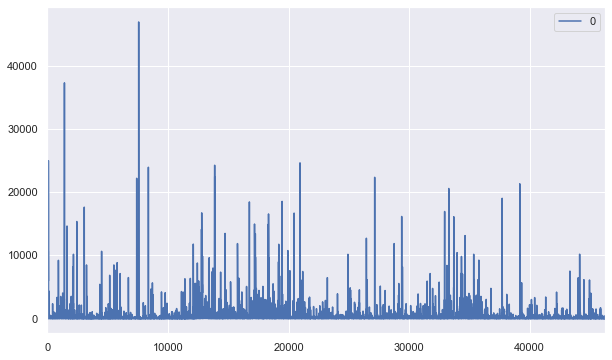

In [23]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
pd.DataFrame(yhat_ts1).plot()

<AxesSubplot:>

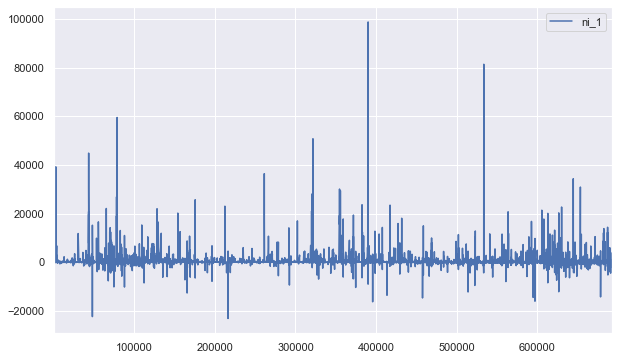

In [24]:
pd.DataFrame(y_ts1).plot()

In [25]:
def median_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.median(np.abs((y_true - y_pred) / y_true)) 

def median_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.median((-(y_true - y_pred) / y_true)) 

pls1_in_mdape = median_absolute_percentage_error(y_tr1, yhat_tr1[:])
pls1_out_mdape = median_absolute_percentage_error(y_ts1, yhat_ts1[:])
pls1_in_mdpe = median_percentage_error(y_tr1, yhat_tr1[:])
pls1_out_mdpe = median_percentage_error(y_ts1, yhat_ts1[:])
print(pls1_in_mdape, pls1_out_mdape, pls1_in_mdpe, pls1_out_mdpe)

1.0499027829225427 0.9682958560140836 -0.9230171070251889 -0.6458298330819496


/Users/mmw/Installations/venvs/mlval/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mmw/Installations/venvs/mlval/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


In [27]:
import seaborn as sns

print(np.asarray(list(X_ts1.keys()))[(np.abs(rf1.coefs_[:]).argsort()[-15:][::-1])])
rf1.score(X_ts1, y_ts1)
sns.set(rc={'figure.figsize':(300,6)})
ax = sns.barplot(x=list(X_ts1.keys()), y=rf1.coefs_[:])

/Users/mmw/Installations/venvs/mlval/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: operands could not be broadcast together with shapes (3,6) (301,3) 

['ib' 'pi' 'intan' 'ebit_-5' 'ebitda_-5' 'niadj' 'debt_ebitda' 'ptpm' 'ni'
 'ocf_lct' 'ni_0' 'evm' 'gpm' 'ceq' 'opmad']


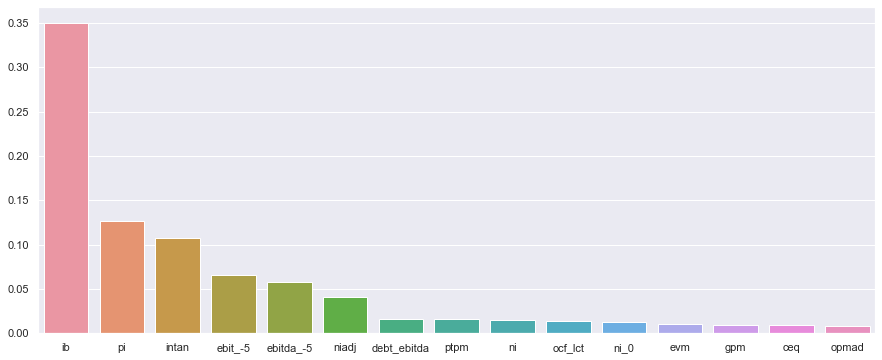

In [30]:
print(np.asarray(list(X_ts1.keys()))[(np.abs(rf1.feature_importances_[:]).argsort()[-15:][::-1])])
rf1.score(X_ts1, y_ts1)
sns.set(rc={'figure.figsize':(15,6)})
ax1 = sns.barplot(x=np.asarray(list(X_ts1.keys()))[rf1.feature_importances_[:].argsort()[-15:][::-1]], 
                  y=(rf1.feature_importances_[:][rf1.feature_importances_[:].argsort()[-15:][::-1]]))